Usar pivot_table

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = {
    'Vendedor': ['Ana', 'Luis', 'Ana', 'Luis', 'Sofía', 'Sofía'],
    'Mes': ['Ene', 'Ene', 'Feb', 'Feb', 'Ene', 'Feb'],
    'Ventas': [200, 150, 300, 220, 180, 210]
}

df = pd.DataFrame(data)


Para la estructura, es necesario definir el data frame, los valores, y cómo se construye la tabla. aggfun ayuda mucho a agregar la operación

In [7]:
pd.pivot_table(df, values='Ventas', columns='Mes', index= 'Vendedor', aggfunc= sum)

Mes,Ene,Feb
Vendedor,,
Ana,200,300
Luis,150,220
Sofía,180,210


Merge:

FUnciona para hacer combinaciones entre dos o más dataframes

In [8]:
# Tabla de estudiantes
estudiantes = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nombre': ['Ana', 'Luis', 'Sofía']
})

# Tabla de notas
notas = pd.DataFrame({
    'ID': [1, 2, 4],
    'Nota': [90, 85, 78]
})

In [10]:
# Unir las notas con los nombres

estudiantes.merge(right= notas, how='outer', on='ID')

,ID,Nombre,Nota
0,1,Ana,90.0
1,2,Luis,85.0
2,3,Sofía,NaN
3,4,NaN,78.0


Ejercicio pandas

In [4]:
import pandas as pd

data = {
    'Estudiante': ['Ana', 'Luis', 'Carlos', 'Ana', 'Luis', 'Carlos', 'Ana', 'Luis', 'Carlos'],
    'Materia': ['Matemáticas', 'Matemáticas', 'Matemáticas',
                'Historia', 'Historia', 'Historia',
                'Biología', 'Biología', 'Biología'],
    'Nota': [85, 78, 92, 88, 80, 79, 90, 75, 95],
    'Año': [2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024]
}

df = pd.DataFrame(data)


In [7]:
# Crear tabla que traiga la media

pd.pivot_table(df, values='Nota',index='Estudiante',columns='Año',aggfunc= 'mean' )

Año,2023,2024
Estudiante,,
Ana,86.5,90.0
Carlos,85.5,95.0
Luis,79.0,75.0


In [8]:
#Une los datos para que cada empleado tenga el nombre de su departamento.

#¿Qué pasa si haces un merge con how='left' y how='right'?

empleados = pd.DataFrame({
    'EmpleadoID': [1, 2, 3, 4],
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Sofía'],
    'DepartamentoID': [10, 20, 10, 30]
})

departamentos = pd.DataFrame({
    'DepartamentoID': [10, 20, 30],
    'NombreDepartamento': ['Ventas', 'Marketing', 'TI']
})


In [12]:
empleados.merge(departamentos, how= 'right', on='DepartamentoID')

,EmpleadoID,Nombre,DepartamentoID,NombreDepartamento
0,1,Ana,10,Ventas
1,3,Carlos,10,Ventas
2,2,Luis,20,Marketing
3,4,Sofía,30,TI


In [14]:
#ejercicio 2

#Crea una columna nueva llamada Total que sea Cantidad * PrecioUnitario.

#Agrupa por ClienteID y calcula cuánto ha gastado cada cliente.

facturas = pd.DataFrame({
    'FacturaID': [1, 2, 3, 4],
    'ClienteID': [100, 101, 100, 103],
    'ProductoID': [501, 502, 501, 503],
    'Cantidad': [2, 1, 5, 3]
})

productos = pd.DataFrame({
    'ProductoID': [501, 502, 503],
    'NombreProducto': ['Teclado', 'Ratón', 'Monitor'],
    'PrecioUnitario': [20.0, 15.0, 150.0]
})

In [ ]:
#Combina los dos DataFrames.

facturas.merge(productos, how='inner', on='ProductoID').assign(
    Can_precio=lambda df:  df['Cantidad'] * df['PrecioUnitario'] )

,FacturaID,ClienteID,ProductoID,Cantidad,NombreProducto,PrecioUnitario,Can_precio
0,1,100,501,2,Teclado,20.0,40.0
1,2,101,502,1,Ratón,15.0,15.0
2,3,100,501,5,Teclado,20.0,100.0
3,4,103,503,3,Monitor,150.0,450.0


In [23]:
df_merge = facturas.merge(productos, how='inner', on='ProductoID')

df_merge['Total'] = df_merge['Cantidad'] * df_merge['PrecioUnitario']

df_merge.groupby('ClienteID')['Total'].sum()

#Tener ordenado el df

df_merge.groupby('ClienteID', as_index=False)['Total'].sum().sort_values('Total', ascending=False)


,ClienteID,Total
2,103,450.0
0,100,140.0
1,101,15.0


In [ ]:
##Crea una columna nueva llamada Total que sea Cantidad * PrecioUnitario.

Ejercicio 3

In [ ]:
estudiantes = pd.DataFrame({
    'EstudianteID': [1, 2, 3],
    'Nombre': ['Ana', 'Luis', 'Marta']
})

cursos = pd.DataFrame({'CursoID': [101, 102, 103],'NombreCurso': ['Matemáticas', 'Historia', 'Programación']})

notas = pd.DataFrame({'EstudianteID': [1, 1, 2, 2, 3, 3],'CursoID': [101, 102, 101, 103, 102, 103],'Nota': [4.5, 3.8, 3.9, 4.2, 4.7, 4.5]})


In [27]:
#Combina todos los DataFrames para tener una tabla con el nombre del estudiante, el nombre del curso y la nota.

df_merge= estudiantes.merge(notas, how='inner', on= 'EstudianteID')

df_merge= df_merge.merge(cursos, how='inner', on='CursoID')

df_merge

,EstudianteID,Nombre,CursoID,Nota,NombreCurso
0,1,Ana,101,4.5,Matemáticas
1,1,Ana,102,3.8,Historia
2,2,Luis,101,3.9,Matemáticas
3,2,Luis,103,4.2,Programación
4,3,Marta,102,4.7,Historia
5,3,Marta,103,4.5,Programación


In [31]:
#Usa pivot_table para mostrar una tabla de estudiantes con sus notas por curso.

df_resume =pd.pivot_table(df_merge, values='Nota',index='Nombre', columns='NombreCurso', aggfunc='mean')

In [41]:
#Agrega una columna de promedio por estudiante.

df_resume['avg_student']= df_resume.mean(axis=1)
df_resume.loc['avg_course'] = df_resume.mean(axis=0)

df_resume

NombreCurso,Historia,Matemáticas,Programación,avg_student
Nombre,,,,
Ana,3.80,4.5,NaN,4.150000
Luis,NaN,3.9,4.20,4.050000
Marta,4.70,NaN,4.50,4.600000
avg_course,4.25,4.2,4.35,4.266667


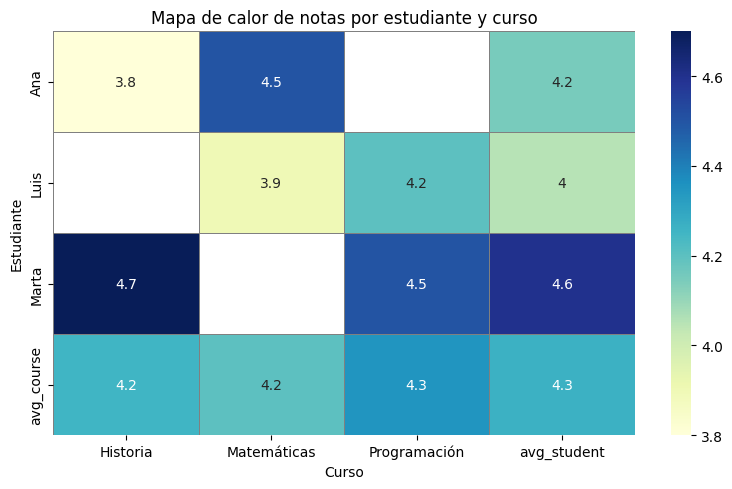

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.heatmap(df_resume, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Mapa de calor de notas por estudiante y curso')
plt.xlabel('Curso')
plt.ylabel('Estudiante')
plt.tight_layout()
plt.show()